# Analiza vzorcev za kvačkanje
V tem dokumentu se nahaja analiza 3000 najbolj priljubljenih vzorcev kvačkanja s spletne strani [Lovecrafts](https://www.lovecrafts.com/en-gb/). Glavni cilj analize je ugotoviti kateri parametri so povezani s ceno in priljubljenostjo izdelkov. Cena je izražena v britanskih funtih (GBP), priljubljenost pa predstavljajo števila od ena do tri tisoč. Manjša kot je številka, višje je na seznamu 'Most loved' na spletni strani.

 Podatki o vzorcih so zbrani v datoteki vzorci.csv. Zbrani so bili 1. septembra, 2025.

## Poglavja
- Priprava na analizo
- Manjkajoči podatki
- Povezava med ceno in priljubljenostjo
- Avtorji
- Potrebna raven znanja
- Vrsta izdelka

## Priprava na analizo

Za analizo bom uporabljala funkcije, ki so shranjene v datoteki imenovani fukcije_za_analizo.py. Iz te datoteke uvozim kar vse funkcije:

In [433]:
from importlib import reload
import funkcije_za_analizo
reload(funkcije_za_analizo)
# zgornje izbriši, ko končaš vse funkcije
from funkcije_za_analizo import *

Moram izločiti vse vrste izdelka, ki imajo ime isto kot je ime vzorca. Ko vrste izdelka namreč ni, se zaradi načina na katerega sem pobirala podatke, pojavi ime izdelka. To bi bilo najbolje spremeniti že pri pobiranju podatkov, vendar takrat nisem opazila, da nimajo vsi izdelko označeno kakšna vrsta izdelka so.

In [434]:
precisti_vrste_izdelkov()

Nato preverim, da imam za vsako kategorijo dovolj podatkov.

In [435]:
vzorci.count()

Ime                3000
Priljubljenost     3000
Cena [£]           3000
Vrsta izdelka      2763
Podjetje           3000
Avtor              2517
Jezik              2998
Število vzorcev    2963
Število strani     2225
Raven znanja       2766
dtype: int64

Najmanj podatkov je za število strani, zato teh raje ne bom uporabila za analizo. Veliko manjkajočih podatkov je tudi za avtorja, kar je nekoliko presenetljivo. Zanimiv podatek se mi zdi tudi, da manjka veliko podatkov o ravni znanja. Zdi se mi kot, da bi ljudje raje izbrali vzorce, ki ocenijo potrebno raven znanja. Zato bom najprej analizirala, če imajo manjkajoči podatki povezavo s priljubljenostjo ali ceno vzorca.

## Manjkajoči podatki
Najprej me zanima, ali obstaja povezava med določenimi manjkajočimi podatki in nižjo priljubljenostjo vzorca. 

> *Opomba*: Ko govorim o nižji ali manjši priljubljenosti, pravzaprav mislim, da ima višje število kot podatek in nasprotno za višjo ali večjo priljubljenost, ker manjše število pomeni, da je vzorec bolj priljubljen.

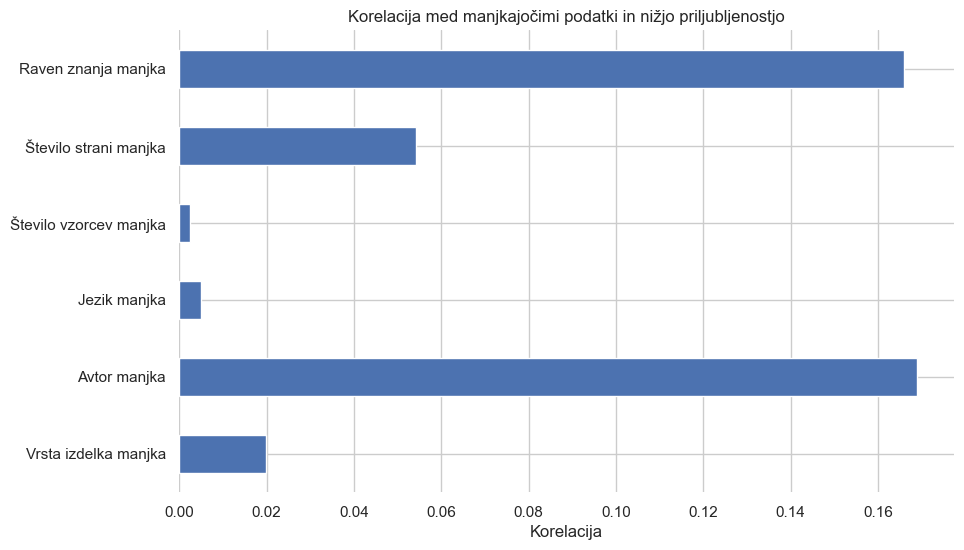

Korelacija z nižjo priljubljenostjo:
	- Vrsta izdelka manjka: 0.020
	- Avtor manjka: 0.169
	- Jezik manjka: 0.005
	- Število vzorcev manjka: 0.003
	- Število strani manjka: 0.054
	- Raven znanja manjka: 0.166


In [436]:
korelacija_manjkanja_in_nizje_('Priljubljenost', 'priljubljenostjo')

Vse povezave so šibke, ampak korelacija z nižjo priljubljenostjo je največja, ko na vzorcu manjka avtor ali potrebna raven znanja. Manjkajoča potrebna raven znanja verjetno negativno vpliva na priljubljenost, ker je tako težje oceniti ali je vzorec primeren za uporabnika. Pri manjkajočem avtorju pa je višja korelacija morda zato, ker lahko na spletni strani ljudje iščejo vzorce glede na avtorja.

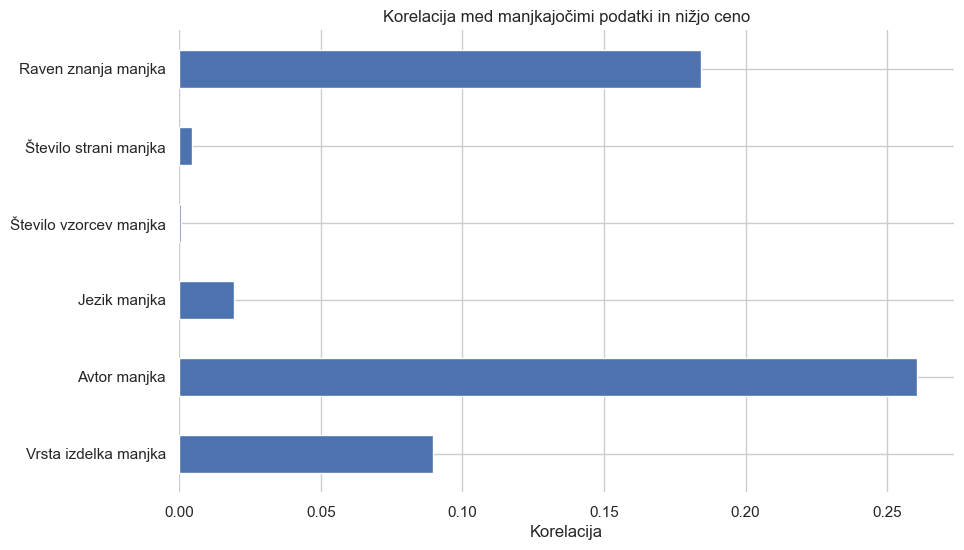

Korelacija z nižjo ceno:
	- Vrsta izdelka manjka: 0.090
	- Avtor manjka: 0.261
	- Jezik manjka: 0.019
	- Število vzorcev manjka: 0.001
	- Število strani manjka: 0.004
	- Raven znanja manjka: 0.184


In [437]:
korelacija_manjkanja_in_nizje_('Cena [£]', 'ceno', -1)

Pri korelaciji med manjkajočimi podatki in nižjo ceno, je podoben trend, kot pri korelaciji med manjkajočimi podatki in nižjo priljubljenostjo. Razlika je predvsem, da ima manjkajoče število strani šibkejšo povezavo s ceno kot s priljubljenostjo. Nasprotno pa imajo manjkajoča vrsta izdelka, manjkajoč avtor ali manjkajoča raven znanja močnejšo povezavo s ceno kot s priljubljenostjo. Najmočnejšo povezavo s ceno ima manjkajoč avtor, vendar je ta povezava še vedno šibka. 

## Povezava med ceno in priljubljenostjo


Ker sta bila grafa v prejšnjem poglavju podobna za ceno in priljubljenost, se mi zdi smiselno preveriti kako tesno sta ti dve povezani. Najprej me zanima vrednost korelacije.

In [438]:
korelacija_cena_priljubljenost()

Korelacija med ceno in priljubljenostjo: 0.527


Povezava med višjo ceno in priljubljenostjo je zmerna, zato predvidevam, da bo v nadaljni analizi, tako kot v prejšnjem poglavju, veliko vrednosti in grafov podobnih za ceno in za priljubljenost.

Zanimivo bi bilo videti tudi graf cene glede na priljubljenost.

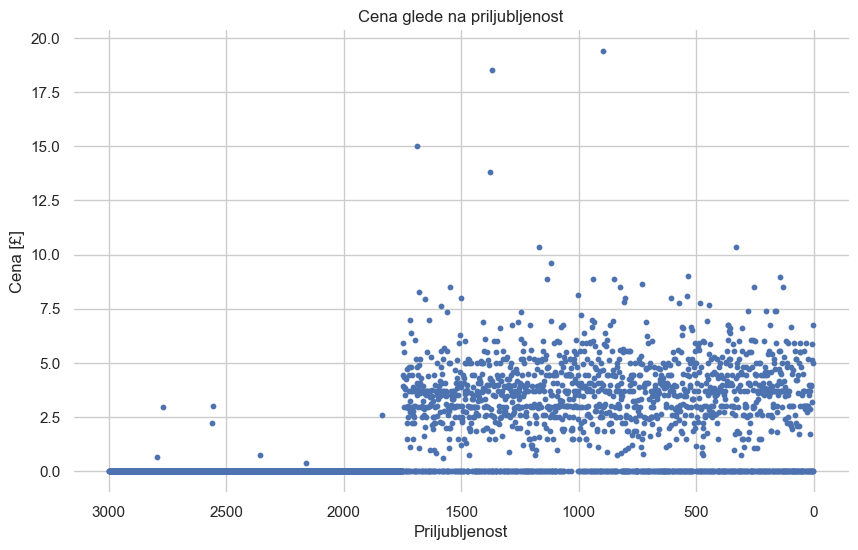

In [439]:
cena_priljubljenost()

Večina vzorcev stane manj kot sedem funtov, kar je povsem pričakovano, le nekaj vzorcev je veliko dražjih. Veliko vzorcev tudi nima cene. To kar se mi zdi najbolj presenetljivo, je, da obstaja število priljubljenosti, po katerem je le še sedem vzorcev, ki so plačljivi. Na pogled izgleda, da je to število 1750. To preverim.

In [440]:
koliko_placljivih_po(1750)

Za vzorce manj priljubljene kot 1750 je 7 plačljivih vzorcev


Izgleda, da to res velja. Tudi, ko sem ročno gledala manj priljubljene vzorce, sem videla, da so neplačljivi. To je zelo nenavadno in ne znam razložiti zakaj se zgodi. Moja misel je, da morda spletna stran ponudi pod najbolj priljubljeno raje plačljive kot neplačljive vzorce, ker od prodaje plačljivih vzorcev dobijo delež zaslužka (https://www.lovecrafts.com/en-gb/c/article/designer-handbook-payment-pricing-taxes?hl=en-GB). Če je to res, ne vem, zakaj je še nekaj plačljivih vzorcev za tem in zakaj je meja ravno 1750.

## Avtorji

V poglavju *Manjkajoči podatki* se je izkazalo, da obstaja povezava med manjkajočim avtorjem na vzorcu in nižjo priljubljenostjo ter ceno tega vzorca. Zdi se mi možno, da manjkajoč avtor na priljubljenost vpliva, ker se da poiskati vse vzorce od istega avtorja. Če je uporabnik zadovoljen z enim vzorcem avtorja, je tako več možnosti, da pogleda še ostale njegove vzorce, kar izboljša priljubljenost ostalih vzorcev, kar poveča možnost, da jih lažje najdejo drugi uporabniki. Verjetno vpliva manjkajoč avtor tudi na ceno, saj predvidevam, da avtorji, ki imajo več napisanih vzorcev, ponavadi objavljajo plačljive.

Zanima me, ali so avtorji najbolj priljubljenih vzorcev v povprečju objavili več vzorcev kot vsi avtorji.

In [441]:
povprecja_napisanih_vzorcev(100, 'Priljubljenost', 'priljubljenih')

Vsi avtorji
Aritmetična sredina: 2.38
Mediana: 1.0

Avtorji najbolj priljubljenih vzorcev:
Aritmetična sredina: 7.39
Mediana: 4.5


Tako mediana kot aritmetična sredina napisanih vzorcev na avtorja sta pri avtorjih 100 najbolj priljubljenih vzorcev več kot trikrat višja kot pri vseh avtorjih. Tukaj pa opozarjam, da ko govorim o objavljenih vzorcih, ta podatek vključuje le objavljene vzorce, ki spadajo med 3000 najbolj priljubljenih vzorcev. 

Ne bi bilo težko implementirati še kode, ki bi za posamezne avtorje poiskala še natančno število objavljenih vzorcev, saj je pri vzorcih povezava do ostalih vzorcev istega avtorja. Na tej strani pa je zapisano število objavljenih vzorcev. Tega nisem storila zaradi manjke časa in ker ne bi s tem pokazala nobenega znanja, ki ga do sedaj še nisem.

Lahko pogledam še avtorje desetih najbolj priljubljenih vzorcev in koliko vzorcev so objavili.

In [442]:
stevilo_objavljenih_vzorcev(10, 'Priljubljenost')

Avtor: število objavljenih vzorcev
KATE EASTWOOD: 7
Jade Gauthier-Boutin: 17
Little Fig: 3
annelies baes: 3
Frisian Knitting: 3
Little Golden Nook: 3
K.A.M.E. Crochet: 22


V tej funkciji sem izključila vzorec, kjer manjka podatek o avtorju, saj se za tega ne da preveriti koliko vzorcev je napisal.

Podobno kot sem za priljubljenost, lahko pogledam tudi za ceno.

In [443]:
povprecja_napisanih_vzorcev(100, 'Cena [£]', 'dragih', False)

Vsi avtorji
Aritmetična sredina: 2.38
Mediana: 1.0

Avtorji najbolj dragih vzorcev:
Aritmetična sredina: 3.83
Mediana: 3.0


Tudi avtorji stotih najbolj dragih vzorcev so v povprečju napisali več vzorcev, kot so jih vsi avtorji v povprečju, vendar je razlika manjša kot pri priljubljenosti.

Pogledam še, koliko vzorcev so napisali avtorji desetih najbolj dragih vzorcev.

In [444]:
stevilo_objavljenih_vzorcev(10, 'Cena [£]', False)

Avtor: število objavljenih vzorcev
isWoolish: 22
Crochet to Play: 1
KATE EASTWOOD: 7
RaffamusaDesigns: 7
Danielle Magalhães: 9
Stephanie Tejidos: 3
Melody Rogers: 1
Galina Litvinova: 2
Rosina Plane: 4


Želim pogledati še, kateri avtorji so objavili največ vzorcev in koliko.

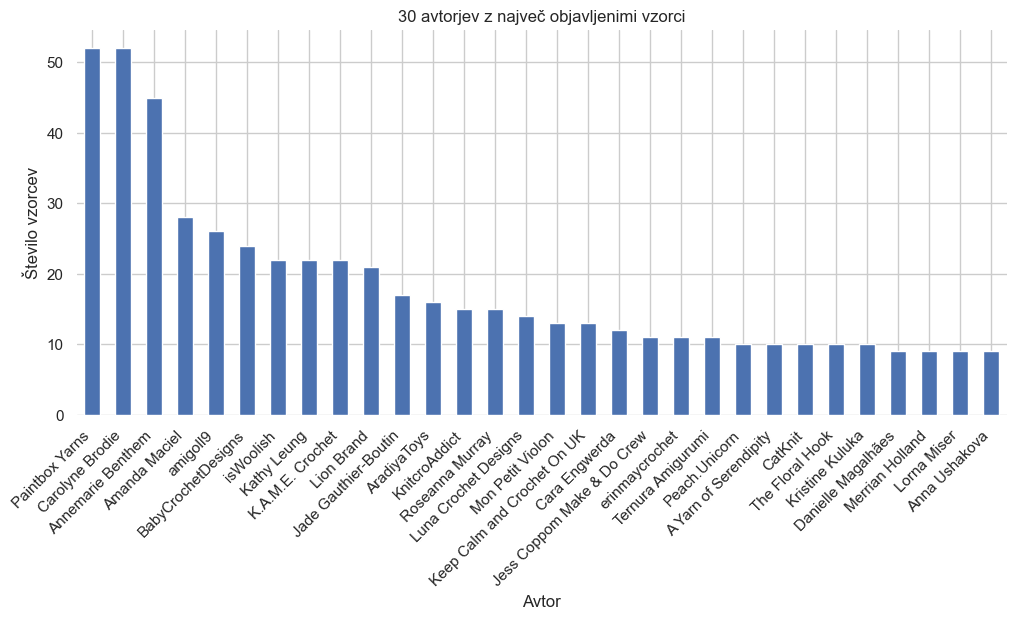

Največ napisanih vzorcev s strani enega avtorja: 52. To predstavlja 1.73% vseh vzorcev


In [445]:
stevilo_del_avtorjev(30)

## Potrebna raven znanja

Zanima me ali ima tudi potrebna raven znanja povezavo s ceno in priljubljenostjo. Zato najprej pogledam, koliko izdelkov je v vsaki posamezni ravni znanja.

In [446]:
stevec('Raven znanja')

Raven znanja
Beginner             1372
Intermediate         1300
Advanced               80
Advanced Beginner      14
Name: count, dtype: int64


Vzorcev z ravnjo znanja 'Advanced' in 'Advanced Beginner' je nekoliko manj, zato je pri sledeči analizi pri teh podatkih potrebno dopustiti možnost, da niso povsem zanesljivi. Sploh vzorci tipa 'Advanced Beginner', saj jih je samo štirinajst.

S tem v mislih, naredim graf, ki prikauje priljubljenost v odvisnosti od ravni znanja.

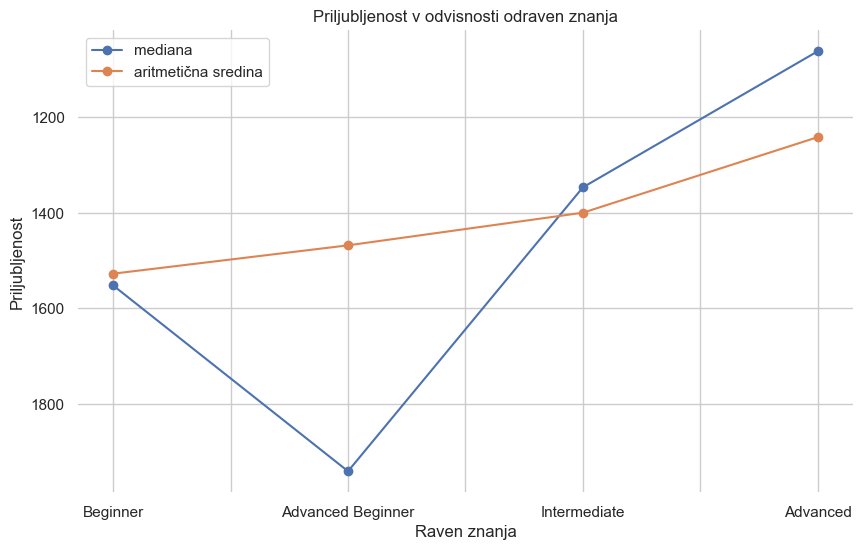

In [447]:
primerjava('Raven znanja', 'Priljubljenost')

Izgleda, kot da so težji izdelki bolj priljubljeni. To me je sprva nekoliko presenetilo, saj sem pričakovala, da bo rezultat ravno obraten. Predstavljala sem si, da obstaja več uporabnikov, ki so manj izkušeni in zato prenesejo več vzorcev. Po premisleku, se mi zdi rezultat smiseln, saj se verjetno mnogo začetnikov, ne vrne po več vzorcev, izkušeni pa bolj konsistentno kvačkajo.

Verjetno je pododbno za pričakovati, tudi pri analizi cene v odvisnosti od ravni znanja.

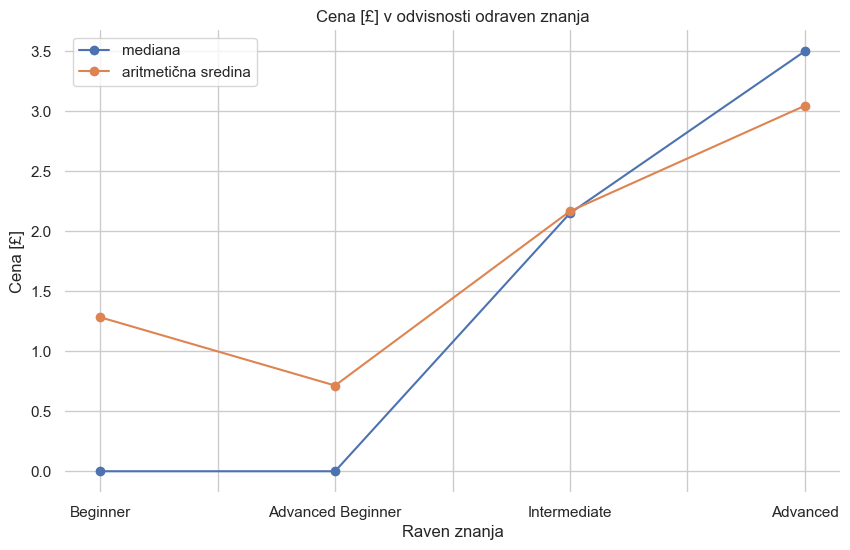

In [448]:
primerjava('Raven znanja', 'Cena [£]')

Res se izkaže, da so vzorci z višjo težavnostjo v povprečju dražji, kar je verjetno, ker začetniki niso pripravljeni za vzorce plačati toliko kot izkušeni kvačkarji, ki so v svoje delo pripravljeni vložiti več denarja.

## Vrsta izdelka

Tako kot pri ravni znanja, najprej pogledam koliko vzorcev je v posamezni kategoriji. 

In [449]:
stevec('Vrsta izdelka')

Vrsta izdelka
Toys                           634
Homeware                       465
Accessories                    439
Tops                           203
Cardigans                      199
Blankets                       153
Hats                           140
Sweaters                        82
Dresses                         70
Shawls                          49
Cushions                        41
Jumpers                         37
Ponchos                         28
Amigurumi                       23
Decorations                     23
Waistcoats                      20
Booties                         19
Scarves & Shawls                17
Jackets                         16
Headbands                       16
Socks                           15
Granny squares                  14
Boleros                         13
Coats                           10
Baby Hats                        5
Pet Clothing                     4
Slippers                         3
Bags                             3
Home  

Ker imam pri vrsti izdelka več različnih kategorij, kot pri ravni znanja, se bom pri analizi omejila na kategorije, ki imajo več kot 50 izdelkov, da bo analiza bolj zanesljiva.

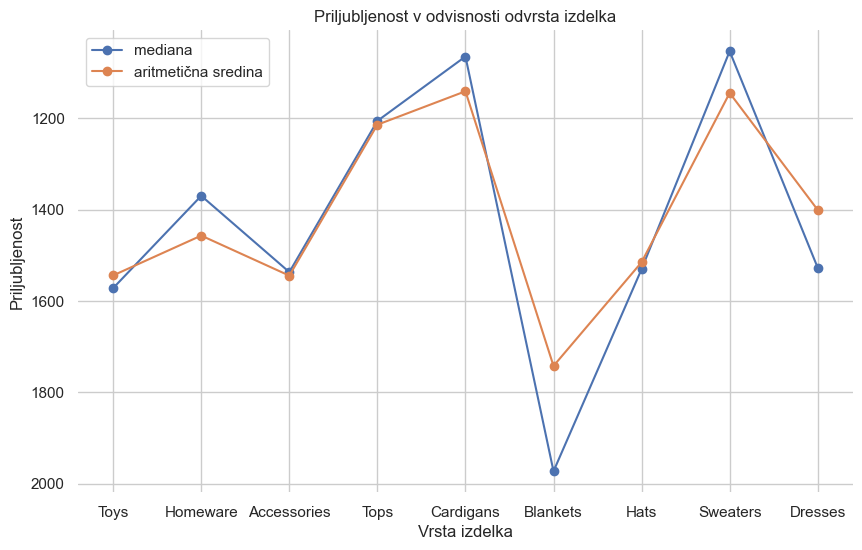

In [450]:
primerjava('Vrsta izdelka', 'Priljubljenost')

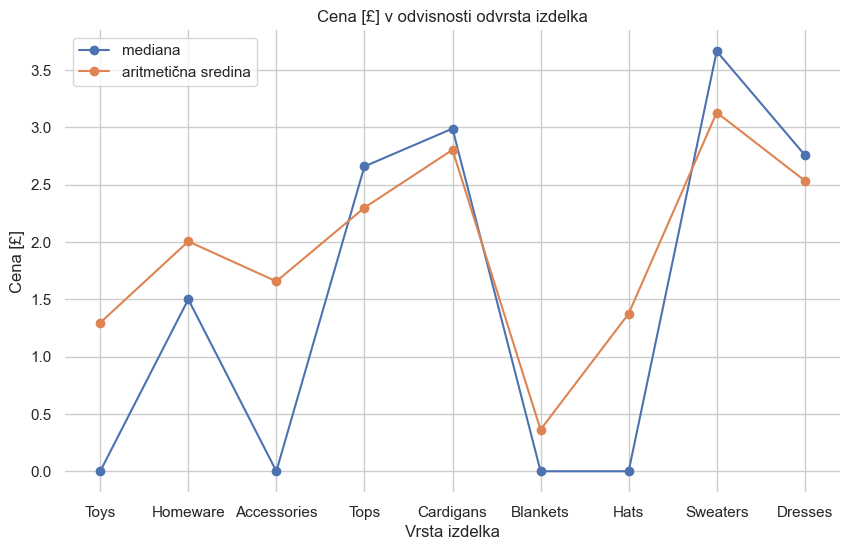

In [451]:
primerjava('Vrsta izdelka', 'Cena [£]')

## Jeziki

## Podjetje

## Število izdelkov